In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def jacobi_iteration(A,b,max_iterations=1000,tolerance=1e-10):
    n = A.shape[0]
    x = np.random.random(n)
    for i in range(max_iterations):
        x_new = np.zeros(n)
        for j in range(n): # 对每一行元素进行更新
            t = np.dot(A[j, :n], x[:n])
            x_new[j] = (b[j]-t+A[j,j]*x[j])/A[j,j]

        if np.linalg.norm(x_new-x)<tolerance:
            print('epoch:',i)
            break
        x = x_new
    return x

In [85]:
x_min,y_min = 0,0
x_max,y_max = 0.833,0.83
nx,ny = 21,21 # 节点的数量
ncx,ncy = nx-1,ny-1 # cell的数量
dx = (x_max-x_min)/nx # 每个cell的长度
dy = (y_max-y_min)/ny # 每个cell的宽度


tolerance = 1e-4
max_iteration = 1000

k = 81 # 导热系数

A = np.zeros([ncx*ncy,ncx*ncy])
b = np.zeros(ncx*ncy)


for i in range(ncx):
    for j in range(ncy):
        idx = i*ncy + j # 当前控制体的索引

        # 边界
        if i == 0 or j == 0 or j == ncy-1:
            A[idx,idx] = 1
            b[idx] = 20
        elif i==ncx-1:
            A[idx,idx] = 1
            b[idx] = 100
        else:
            # 计算周围四个控制体的索引
            left_idx = idx - ncy
            right_idx = idx + ncy
            top_idx = idx - 1
            bottom_idx = idx + 1

            # 计算控制体的体积和侧面面积
            v = 1*dx*dy
            s_x = 1*dy
            s_y = 1*dx
            # 计算控制体的系数矩阵
            af1 = -k*s_x/dx
            af2 = -k*s_x/dx
            af3 = -k*s_y/dy
            af4 = -k*s_y/dy
            A[idx,idx] = -(af1+af2+af3+af4)
            A[idx,left_idx] = af1
            A[idx,top_idx] = af2
            A[idx,right_idx] = af3
            A[idx,bottom_idx] = af4
            b[idx] = 0 # 默认无热源

# 热源
# b[nx * ncy // 2 + ncy // 3] = 100  # 设置热源值
# b[nx * ncy // 2 + ncy*2 // 3] = 100  # 设置热源值



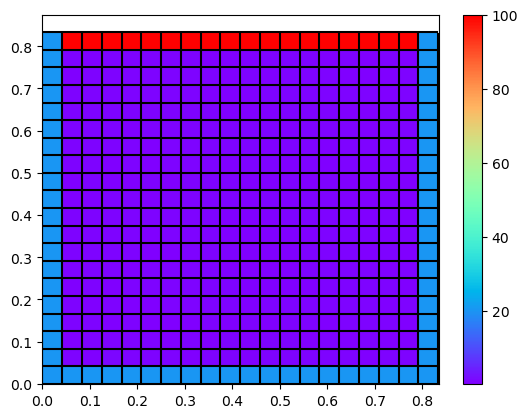

In [110]:
# 迭代一步，方便查看边界
T = jacobi_iteration(A,b,1,tolerance)
# 构造二维网格
x = np.linspace(x_min,x_max , nx)
y = np.linspace(y_min, y_max, ny)
X, Y = np.meshgrid(x, y)
x_c = np.linspace(x_min+dx/2,x_max-dx/2,ncx) #cell的中心横坐标
y_c = np.linspace(y_min+dy/2,y_max-dy/2,ncy) # cell的中心纵坐标
X_c,Y_c = np.meshgrid(x_c,y_c)
# 绘制等高线图
plt.pcolormesh(X_c, Y_c, T.reshape(ncx,ncy),cmap='rainbow')
# 绘制网格
plt.plot(X,Y,color='black')
plt.plot(Y,X,color='black')
# 绘制颜色条
plt.colorbar()
plt.show()

epoch: 827


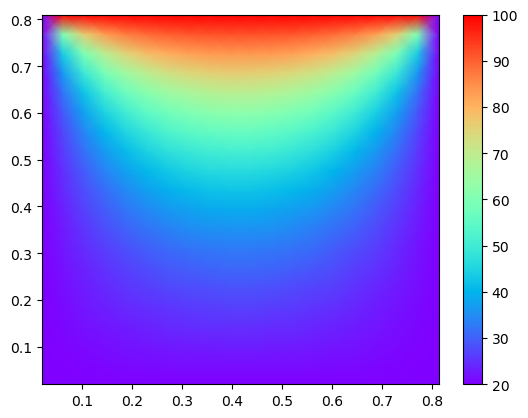

In [117]:
# 迭代至收敛，看稳态结果
# 求解线性方程组
T = jacobi_iteration(A,b,max_iteration,tolerance)
# 绘制等高线图
plt.pcolormesh(X_c, Y_c, T.reshape(ncx,ncy),cmap='rainbow',shading='gouraud')
# # 绘制网格
# plt.plot(X,Y,color='black')
# plt.plot(Y,X,color='black')
# 绘制颜色条
plt.colorbar()
plt.show()

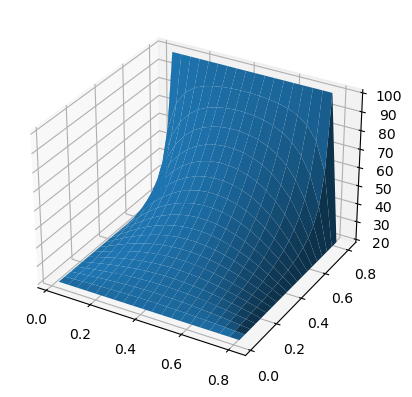

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X_c,Y_c,T.reshape(ncx,ncy))
plt.show()

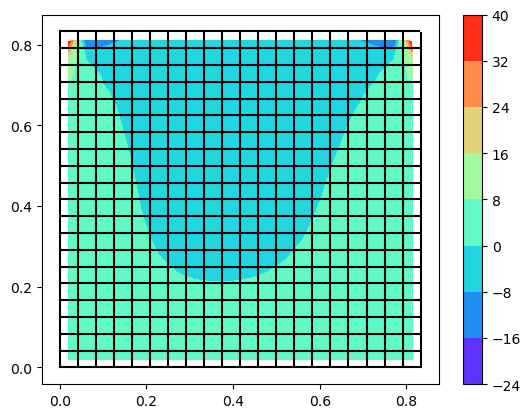

In [118]:
# 读入comsol计算结果
data = np.loadtxt('a.txt',skiprows=9)
x = data[:,0]
y = data[:,1]
t = data[:,2]
tpc = plt.contourf(X_c,Y_c,(t-T).reshape(20,20),cmap='rainbow')
plt.plot(X,Y,color='black')
plt.plot(Y,X,color='black')
plt.colorbar(tpc)
plt.show()